# Lab | Customer Analysis Round 5

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.


### 1. Get the data

We are using the `marketing_customer_analysis.csv` file.


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore') 

import pickle

# Normalizing data
transformer = Normalizer() # Normalizer works column wise, so don't use it on the target 
# (X-y split comes first, or else your features will carry information from the target)
transformer.fit(X_num) # you'll always only fit on the trainning data

# When Normalizing with encoded categorical data, you'll lose some information on the categories.
# When Normalizing only numericals, you'll be losing proportion between numericals and encoded categories.

with open('transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)

with open('transformer.pkl', 'rb') as file:
    transformer = pickle.load(file)

x_normalized = transformer.transform(X_num)
#pd.DataFrame(x_normalized)
x_normalized.shape

(9134, 7)

In [2]:
mca = pd.read_csv('/Users/spicasumampouw/IronSpica/lab/lab-customer-analysis-round-5/files_for_lab/csv_files/marketing_customer_analysis.csv')


### 2. Dealing with the data

Already done in the round 2.



In [3]:
mca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### 3. Explore the data

Some datasets have values that are missing, invalid, or otherwise difficult for an algorithm to process. If data is missing, the algorithm can’t use it. If data is invalid, the algorithm produces less accurate or even misleading outcomes. Some datasets are relatively clean but need to be shaped (e.g., aggregated or pivoted) and many datasets are just lacking useful business context (e.g., poorly defined ID values), hence the need for feature enrichment. Good data preparation produces clean and well-curated data which leads to more practical, accurate model outcomes.


   **3.1.- Determine the problems**
    
   **3.2.- Data cleaning** Cleaning the data is very important as the model learning from that data only, so if we feed inconsistent, appropriate data to model it will return garbage only, so it is required to make sure that the data does not contains any unseen problem.
     
       - Feature and Target Variables
       - Data Types
       - Missing data, check null values
       - Outliers
       - Duplicate data
        
   **3.3.- Feature selection** (Which variables are important to answer our questions?)
    
   **3.4.- Data transformation**

In [8]:
#cleanmca = mca.dropna()
#cleanmca.isnull().sum()
#cleanmca = cleanmca.drop_duplicates(
cleanmca.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
cleanmca = cleanmca.corr()
cleanmca

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [10]:
cleanmca['Monthly Premium Auto'] = cleanmca['Monthly Premium Auto'].fillna(cleanmca['Monthly Premium Auto'].mean())

In [14]:
cleanmca[(cleanmca['Monthly Premium Auto'] > 0.8) | (cleanmca['Monthly Premium Auto'] < -0.8)][['Monthly Premium Auto', 'Total Claim Amount']]

,Monthly Premium Auto,Total Claim Amount
Monthly Premium Auto,1.0,0.632017


### 4. Processing Data

(_Further processing..._)

- X-y split.
- Normalize (numerical).

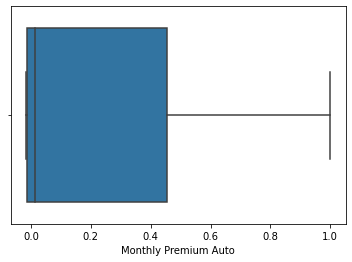

In [11]:
sns.boxplot(x=cleanmca['Monthly Premium Auto'])
plt.show()

In [15]:
iqr = np.percentile(cleanmca['Monthly Premium Auto'],75) - np.percentile(cleanmca['Monthly Premium Auto'],25)

In [16]:
upper_limit = np.percentile(cleanmca['Monthly Premium Auto'],75) + 1.5*iqr
lower_limit = np.percentile(cleanmca['Monthly Premium Auto'],25) - 1.5*iqr
upper_limit, lower_limit

(1.1555589589318986, -0.7120636814721791)

In [20]:
cleanmca1 = cleanmca[(cleanmca['Monthly Premium Auto']>lower_limit) & (cleanmca['Monthly Premium Auto']<upper_limit)]
cleanmca1

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [21]:
cleanmca1.loc[(cleanmca1['Monthly Premium Auto']>upper_limit), 'Monthly Premium Auto'] =  upper_limit

In [24]:
iqr = np.percentile(cleanmca1['Monthly Premium Auto'],75) - np.percentile(cleanmca1['Monthly Premium Auto'],25)
upper_limit = np.percentile(cleanmca1['Monthly Premium Auto'],75) + 1.5*iqr
lower_limit = np.percentile(cleanmca1['Monthly Premium Auto'],25) - 1.5*iqr
upper_limit, lower_limit

(1.1555589589318986, -0.7120636814721791)

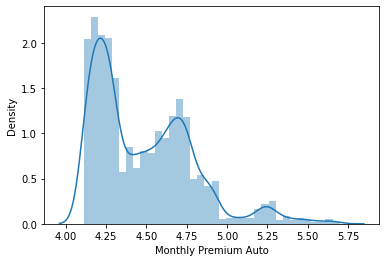

In [26]:
mca1 = mca.copy()

# we are replacing the -inf values after we take logarithm of 0
# we'll test 2 options (replacing -inf by zero or by the mean of the column after the log transformation)

log_lmbda = lambda x: np.log(x) if np.isfinite(np.log(x)) else np.NAN

mca1['Monthly Premium Auto'] = mca1['Monthly Premium Auto'].apply(log_lmbda)

mca1['Monthly Premium Auto'] = mca1['Monthly Premium Auto'].fillna(np.mean(mca1['Monthly Premium Auto']))

sns.distplot(mca1['Monthly Premium Auto'])
plt.show()

In [28]:
X = mca1.drop(['Monthly Premium Auto'], axis=1)
X_num = X.select_dtypes(include = np.number)

In [29]:
X_num

,Customer Lifetime Value,Income,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,32,5,0,1,384.811147
1,6979.535903,0,13,42,0,8,1131.464935
2,12887.431650,48767,18,38,0,2,566.472247
3,7645.861827,0,18,65,0,7,529.881344
4,2813.692575,43836,12,44,0,1,138.130879
...,...,...,...,...,...,...,...
9129,23405.987980,71941,18,89,0,2,198.234764
9130,3096.511217,21604,14,28,0,1,379.200000
9131,8163.890428,0,9,37,3,2,790.784983
9132,7524.442436,21941,34,3,0,3,691.200000


In [32]:
pd.DataFrame(x_normalized)

,0,1,2,3,4,5,6
0,0.049048,0.998773,0.000568,0.000089,0.000000,0.000018,0.006830
1,0.987094,0.000000,0.001839,0.005940,0.000000,0.001131,0.160019
2,0.255478,0.966749,0.000357,0.000753,0.000000,0.000040,0.011230
3,0.997568,0.000000,0.002348,0.008481,0.000000,0.000913,0.069134
4,0.064055,0.997941,0.000273,0.001002,0.000000,0.000023,0.003145
...,...,...,...,...,...,...,...
9129,0.309386,0.950932,0.000238,0.001176,0.000000,0.000026,0.002620
9130,0.141859,0.989733,0.000641,0.001283,0.000000,0.000046,0.017372
9131,0.995331,0.000000,0.001097,0.004511,0.000366,0.000244,0.096411
9132,0.324250,0.945501,0.001465,0.000129,0.000000,0.000129,0.029786


In [33]:
transformer = StandardScaler()
transformer.fit(X_num)

x_standardized = transformer.transform(X_num)
x_standardized#.shape


array([[-0.76287773,  0.61282744,  1.67809933, ..., -0.42224956,
        -0.82264788, -0.16963969],
       [-0.14924546, -1.23961684, -0.2081864 , ..., -0.42224956,
         2.10615996,  2.400737  ],
       [ 0.71063622,  0.36570978,  0.28820458, ..., -0.42224956,
        -0.40424676,  0.45573376],
       ...,
       [ 0.02313483, -1.23961684, -0.60529919, ...,  2.87324529,
        -0.40424676,  1.22793667],
       [-0.06993547, -0.51735647,  1.87665573, ..., -0.42224956,
         0.01415436,  0.88511256],
       [-0.78495478, -1.23961684, -1.20096836, ..., -0.42224956,
        -0.82264788, -0.22200449]])

In [34]:
pd.DataFrame(x_standardized)

,0,1,2,3,4,5,6
0,-0.762878,0.612827,1.678099,-1.543287,-0.422250,-0.822648,-0.169640
1,-0.149245,-1.239617,-0.208186,-0.217334,-0.422250,2.106160,2.400737
2,0.710636,0.365710,0.288205,-0.360680,-0.422250,-0.404247,0.455734
3,-0.052263,-1.239617,0.288205,0.606907,-0.422250,1.687759,0.329769
4,-0.755575,0.203390,-0.307465,-0.145661,-0.422250,-0.822648,-1.018843
...,...,...,...,...,...,...,...
9129,2.241590,1.128558,0.288205,1.466984,-0.422250,-0.404247,-0.811934
9130,-0.714411,-0.528450,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956
9131,0.023135,-1.239617,-0.605299,-0.396517,2.873245,-0.404247,1.227937
9132,-0.069935,-0.517356,1.876656,-1.614960,-0.422250,0.014154,0.885113


<AxesSubplot:ylabel='Density'>

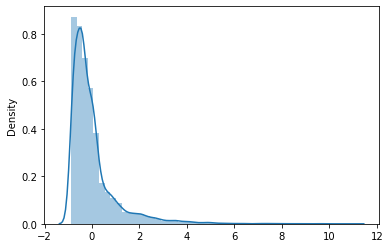

In [35]:
sns.distplot(x_standardized.T[0])

In [36]:
pd.DataFrame(x_standardized).mean()

0    1.168080e-17
1    5.160945e-16
2    4.976191e-17
3    1.003260e-16
4   -1.232865e-16
5    3.747702e-16
6    7.961420e-19
dtype: float64